In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/supermarket.csv')

Invoice ID : 자동 생성 식별 번호
Branch : 지사 명
City : 마켓이 위치한 도시 이름
Customer type :
Member : 회원카드 사용
Normal : 회원카드 미사용
Gender : 성별
Product line: 품목 분류
Unit price : 단가
Quantity : 수량
Tax 5% : 세금 5%
Total : 전체 금액
Date : 날짜
Time : 시간
Payment : 결제방법
cogs : 매출원가
gross margin percentage : 이익률
gross income : 이익
Rating : 고객에 평가한 쇼핑경험에 대한 점수(1~10)

# 성별에 따른 각 도시 방문 빈도수

<AxesSubplot:xlabel='City', ylabel='count'>

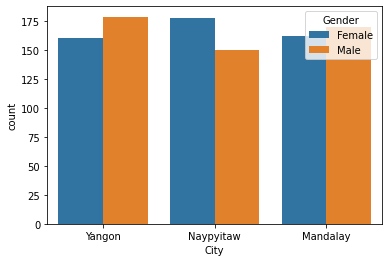

In [169]:
sns.countplot(data = data, x='City' , hue = 'Gender')

- 남여의 세도시 마트 이용량은 비슷하다.
- 남성의 경우 Yangon을 이용하는 빈도수가 가장 많다.
- 여성의 경우 Naypyitaw를 이용하는 빈도수가 가장 많다.
- 남성의 경우 Naypyitaw을 이용하는 빈도수가 가장 적다.
- 여성의 경우 Yangon을 이용하는 빈도수가 가장 적다.

<AxesSubplot:xlabel='Payment', ylabel='count'>

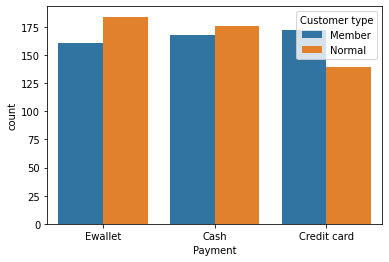

In [232]:
sns.countplot(data = data, x='Payment' , hue = 'Customer type')

# 각 품목에 대한 마트별 이익

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

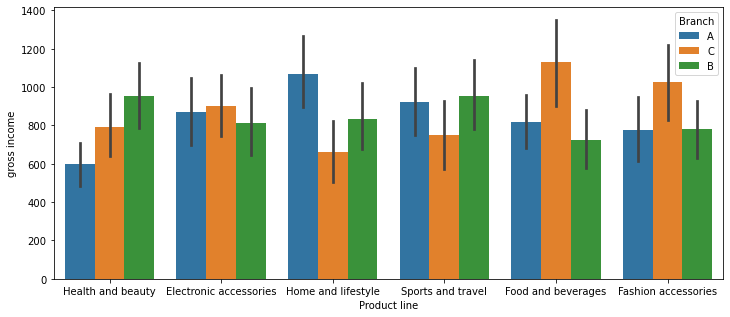

In [161]:
plt.figure(figsize =(12,5) ) 
sns.barplot(data = data, x = 'Product line' , y='gross income', hue = 'Branch' , estimator = sum)

- A마트는 Health and beauty 품목의 이익이 가장 적다.
- A마트는 Home and lifestyle 품목의 이익이 가장 많다.
- C마트는 Home and lifestyle 품목의 이익이 가장 적다.
- C마트는 food and beverages 품목의 이익이 가장 많다.
- B마트는 Health and beauty 품목의 이익이 가장 많다.
- B마트는 food and beverages  품목의 이익이 가장 적다.
- Electronic accessories의 이익은 세마트가 비슷하게 보이는 것으로 보았을때 판매액이 비슷할 것으로 보인다.

# 각 품목에 대한 남여별 판매액

<AxesSubplot:xlabel='Product line', ylabel='Total'>

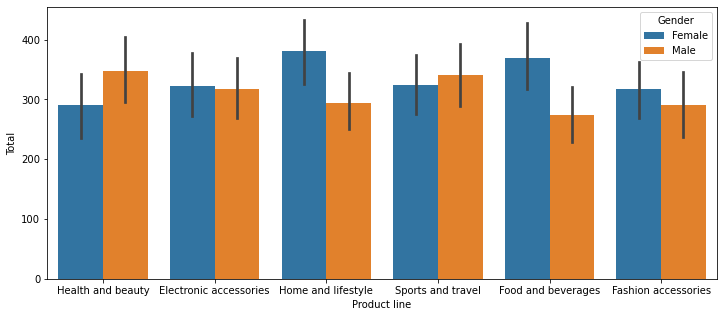

In [134]:
plt.figure(figsize =(12,5)) 
sns.barplot(data=data, x = 'Product line' , y = 'Total',  hue = 'Gender' )

- 여성의 경우 Home and lifestyle에 대한 지출이 가장 크다.
- 남성의 경우 Health and beauty 나 sports and travel 품목에 대한 지출이 가장 크다.
- 여성의 경우 Health and beauty에 대한 지출이 가장 적다.
- 남성의 경우 Food and beverages 에 대한 지출이 가장 적다.

# 각 품목에 대한 이익

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

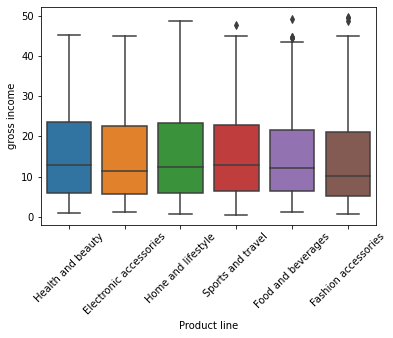

In [146]:
plt.xticks(rotation = 45)
sns.boxplot(data=data, x = 'Product line' , y = 'gross income')

- 각품목의 이익 값은 비슷하다
- sports and travel, food and beverages, fashion accessories는 이상치를 넘는 가격의 이익이 가끔 있다.

# 각 품목의 총 판매갯수

<AxesSubplot:xlabel='Product line', ylabel='sum_pl'>

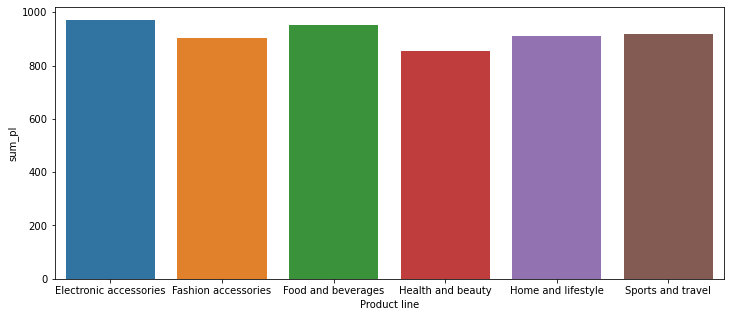

In [167]:
plt.figure(figsize =(12,5)) 
data_pl = data.groupby('Product line', as_index = False ).agg(sum_pl = ('Quantity','sum')) #품목의 총 갯수의 합
sns.barplot(data = data_pl , x= 'Product line', y = 'sum_pl')

- 품목들의 팔린 갯수는 비슷하다
- 가장 많은 갯수가 팔린 상품은 Electronic accessories 이다
- 가장 적은 갯수가 팔린 상품은 Health and beauty 이다

# 회원카드를 사용한 사람들이 가장 많은 지출을 한 품목

<AxesSubplot:xlabel='sum_total', ylabel='Product line'>

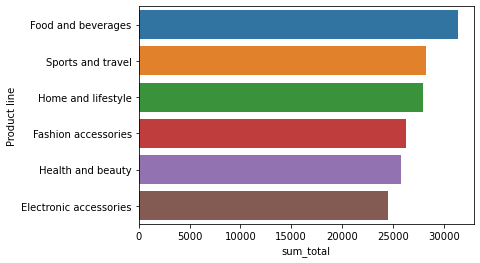

In [113]:
member = data[data['Customer type'] == 'Member'] #회원카드 소지자 구분
member_total = member.groupby('Product line', as_index = False)
.agg(sum_total = ('Total', 'sum')).sort_values(by = 'sum_total', ascending = False)  #각 품목의 총 판매액 합산
sns.barplot(data = member_total, x = 'sum_total', y = 'Product line') 

- 회원카드를 소지한 사람들이 가장 많이 지출을 한 품목은 food and beverages 다.
- 회원카드를 소지한 사람들이 가장 적은 지출을 한 품목은 Electronic accessories 이다.
- 회원카드를 소지한 사람들에게 food and beverages를 이용한 이벤트를 하면 다른 품목에 비해 좋은 성과를 얻을 수 있을것으로 보인다.

# 3월의 판매 전체금액

<AxesSubplot:xlabel='Date', ylabel='Total'>

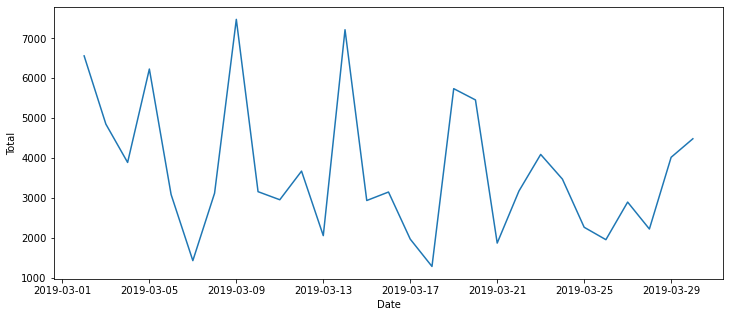

In [222]:
data['Date'] = pd.to_datetime(data['Date'])
data_03= pd.pivot_table(data=data, index = 'Date' , values ='Total', aggfunc='sum')[60:] #3월 매출량
plt.figure(figsize =(12,5))
sns.lineplot(data = data_03, x = 'Date', y = 'Total')

- 3월의 경우 9일자에 판매 총액이 가장 높다.
- 3월 말에는 판매 총액이 낮은 날이 많다.

# 1월 판매이익

<AxesSubplot:xlabel='Date', ylabel='gross income'>

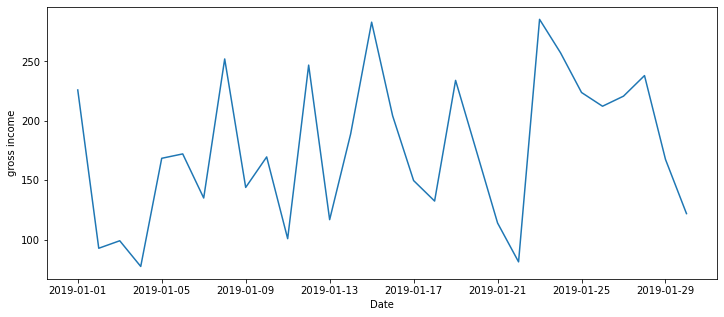

In [223]:
data_01 = pd.pivot_table(data=data, index = 'Date' , values ='gross income', aggfunc='sum')[:30] #1월 매출량 
plt.figure(figsize =(12,5))
sns.lineplot(data = data_01, x = 'Date', y = 'gross income')

- 1월의 경우 중순에서 말까지의 이익이 높은 편이다.
- 1월 초에는 이익이 줄어드는 편이다.

# 각 마트의 평균 점수

<AxesSubplot:xlabel='Branch', ylabel='mean_rate'>

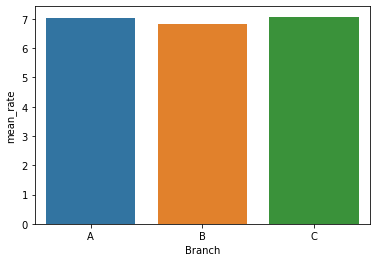

In [176]:
data_rate = data.groupby('Branch', as_index = False).agg(mean_rate = ('Rating','mean'))
sns.barplot(data = data_rate , x= 'Branch', y = 'mean_rate')

- 각 마트의 평균 평가점수는 비슷하다.
- 세 마트중 B마트가 평가점수가 가장 낮다.
- A와 C마트는 평균 평가점수가 거의 동일하다.

# 시간대별 매출 합계

<AxesSubplot:xlabel='time(hour)', ylabel='Total'>

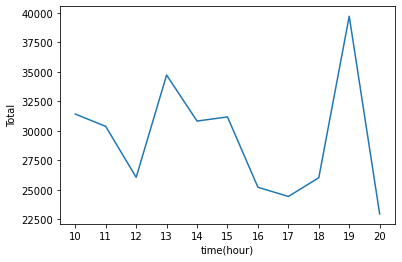

In [312]:
data['time(hour)'] =data['Time'].apply(lambda x: x.split(':')[0]) #Time에서 시간만 추출
data_timetotal = data.groupby('time(hour)')[['Total']].sum().sort_values(by = 'time(hour)') #타임을 기준으로 매출액 그룹핑
sns.lineplot(data = data_timetotal , x = 'time(hour)', y ='Total' )

- 하루 시간 중 19시의 매출액이 가장 높다
- 하루 시간 중 15시의 매출액이 가장 낮다
- 매장의 영업시간은 10시부터 20시까지이다.
- 18시부터 19시는 매출이 급격히 상승하는 시간대이다.
- 16시부터 18시는 매출이 낮은 시간대이다.